In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from keras.datasets import mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import pickle
from sklearn import svm
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from google.colab.patches import cv2_imshow

In [24]:
!pwd
!rm -rf ASL-PSL-Sign-Language-Gestures
!rm -rf Gestures

/content


In [25]:
!git clone https://github.com/KuldeepDileep/ASL-PSL-Sign-Language-Gestures.git
!rm -rf ASL Gestures
!rm -rf PSL Gestures
!mkdir -p Gestures

Cloning into 'ASL-PSL-Sign-Language-Gestures'...
remote: Enumerating objects: 405, done.
remote: Total 405 (delta 0), reused 0 (delta 0), pack-reused 405
Receiving objects: 100% (405/405), 717.55 MiB | 44.89 MiB/s, done.
Resolving deltas: 100% (90/90), done.
Checking out files: 100% (61/61), done.


In [26]:
import zipfile
with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/m.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Gestures')
with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/d.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Gestures')
with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/u.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Gestures')

In [27]:
TrainDir = '/content/Gestures'

count=0
current_id = 0
label_ids = {}
x_train = []
y_labels= []

image_train = []
label_train =[]


#---------------------------------------Extracting Train Images-----------------------------------------
for root, dirs, files in os.walk(TrainDir):
    for file in files:
        if file.endswith("png") or  file.endswith("jpeg") or file.endswith("jpg"):
            count+=1
            path = os.path.join(root, file)
            label = os.path.basename(os.path.dirname(path)).replace(" ",",").lower()
            label = os.path.basename(root).replace(" ",",").lower()
            if not label in label_ids: #if the current label is not in dictionsry we save it with the corresponding current_id i.e 0,1,2
                label_ids[label] = current_id
                current_id +=1
            id_ = label_ids[label]
            label_train.append(id_)

            
            image_array = plt.imread(path)
            image_array = cv2.resize(image_array, (224,224), interpolation=cv2.INTER_LINEAR)
            #image_array = cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
            image_array = np.array(image_array, dtype='float16')
            image_train.append(image_array)
            #print(image_array)
print("----------------------------Label_ids----------------------------------")
print(label_ids)
print(label_ids)
print(count)

----------------------------Label_ids----------------------------------
{'h': 0, 'b': 1, 'm': 2, 'd': 3, 'p': 4, 'i': 5, 'n': 6, 'v': 7, 'c': 8, 'a': 9, 'g': 10, 'e': 11, 'u': 12, 'k': 13}
{'h': 0, 'b': 1, 'm': 2, 'd': 3, 'p': 4, 'i': 5, 'n': 6, 'v': 7, 'c': 8, 'a': 9, 'g': 10, 'e': 11, 'u': 12, 'k': 13}
4200


In [28]:
image_train = np.asarray(image_train)
label_train = np.asarray(label_train)
x_train = image_train
y_train = label_train
print(image_train[0].shape)
print(y_train.shape)
print(x_train.shape)

(224, 224)
(4200,)
(4200, 224, 224)


Spliting data:

In [29]:
#-----------------------------------------------Test and Train Spli--------------------------------------
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(3360, 224, 224)
(840, 224, 224)


Data Normalization:

In [30]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_test)

One-Hot Encoding:

In [31]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3360, 224, 224)
(3360, 14)
(840, 224, 224)
(840, 14)


Convolutional Neural Network (CNN):

In [33]:
x_train = x_train.reshape((x_train.shape[0], 224, 224, 1))
x_test = x_test.reshape((x_test.shape[0], 224, 224, 1))

In [41]:
epochs = 50
num_classes = 14
CNN_model = Sequential()
#------------------------------------
CNN_model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(224,224,1)))
CNN_model.add(LeakyReLU(alpha=0.1))
CNN_model.add(MaxPooling2D((3, 3),padding='same'))
CNN_model.add(Dropout(0.5))
#------------------------------------
CNN_model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
CNN_model.add(LeakyReLU(alpha=0.1))
CNN_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
CNN_model.add(Dropout(0.5))

#------------------------------------
CNN_model.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
CNN_model.add(LeakyReLU(alpha=0.1))                  
CNN_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
CNN_model.add(Dropout(0.5))
#------------------------------------

CNN_model.add(Conv2D(384, (3, 3), activation='relu',padding='same'))
CNN_model.add(LeakyReLU(alpha=0.1))                  
CNN_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
CNN_model.add(Dropout(0.5))

CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(LeakyReLU(alpha=0.1))
#------------------------------------           
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(num_classes, activation='softmax'))

CNN_model.summary()


CNN_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history = CNN_model.fit(x_train, y_train,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 75, 75, 128)       0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 38, 38, 128)      

VGG16 (Pretrained CNN based model with 12 layers):

In [28]:
vgg16_model = keras.applications.vgg16.VGG16()
#vgg16_model = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 1)))
vgg16_model.summary()
# print("#----------------VGG16 Summary-------------#")
for layer in vgg16_model.layers:
  CNN_model.add(layer)
# print("#----------------CNN Summary----------------#")
CNN_model.summary()
CNN_model.layers.pop()
for layer in CNN_model.layers:
  layer.trainable = False     #Freezing layers so that these are not trained
CNN_model.add(Dense(num_classes, activation='softmax'))
# print("#----------------CNN Summary--------#")
CNN_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 224, 224, 3))
x_test = x_test.reshape((x_test.shape[0], 224, 224, 3))

In [50]:
CNN_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history = CNN_model.fit(x_train, y_train,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 3360 samples, validate on 840 samples
Epoch 1/50
3360/3360 [==============================] - 13s 4ms/step - loss: 2.4685 - accuracy: 0.5330 - val_loss: 2.4677 - val_accuracy: 0.5488
Epoch 2/50
3360/3360 [==============================] - 13s 4ms/step - loss: 2.4658 - accuracy: 0.5580 - val_loss: 2.4651 - val_accuracy: 0.5655
Epoch 3/50
3360/3360 [==============================] - 13s 4ms/step - loss: 2.4629 - accuracy: 0.6021 - val_loss: 2.4619 - val_accuracy: 0.5798
Epoch 4/50
3360/3360 [==============================] - 13s 4ms/step - loss: 2.4600 - accuracy: 0.6104 - val_loss: 2.4588 - val_accuracy: 0.5762
Epoch 5/50
3360/3360 [==============================] - 13s 4ms/step - loss: 2.4573 - accuracy: 0.5899 - val_loss: 2.4565 - val_accuracy: 0.5762
Epoch 6/50
3360/3360 [==============================] - 13s 4ms/step - loss: 2.4544 - accuracy: 0.5762 - val_loss: 2.4533 - val_accuracy: 0.5548
Epoch 7/50
3360/3360 [==============================] - 13s 4ms/step - loss: 2.4517

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


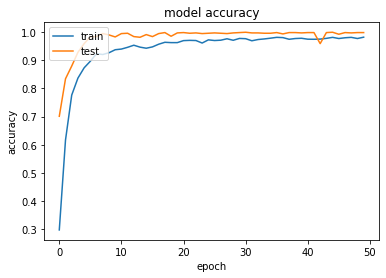

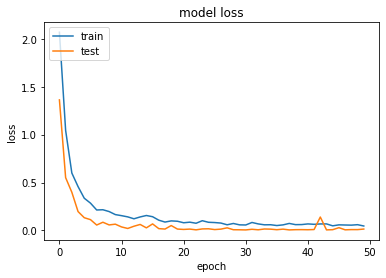

In [42]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
result = CNN_model.evaluate(x_train, y_train)
print('train loss, train acc:', result)
result2 = CNN_model.evaluate(x_test, y_test)
print('test loss, test acc:', result2)

3360/3360 [==============================] - 6s 2ms/step
train loss, train acc: [0.005340931020466433, 0.9997023940086365]
840/840 [==============================] - 1s 2ms/step
test loss, test acc: [0.013649754293839491, 0.9988095164299011]


In [44]:
print(history.history.values())

dict_values([[1.362811483655657, 0.5507602873302642, 0.3978803302560534, 0.1963818287210805, 0.1321866683484543, 0.11214669949951626, 0.05578977983622324, 0.08494898416101933, 0.05687831896578982, 0.06470613223278807, 0.03588323883180108, 0.019921459277559603, 0.04316855941766075, 0.061856014290381046, 0.026204990996934827, 0.0674547654532251, 0.018082886583925713, 0.013831576390103215, 0.05030656114575409, 0.013655202270352414, 0.009833108543673353, 0.013349412228646024, 0.005532372452857782, 0.015027709522456419, 0.016577157323869565, 0.008324055552033574, 0.012965054989105001, 0.026568909177911423, 0.006754734601764496, 0.006077926031624278, 0.004737587537619263, 0.011449527139553712, 0.006045019491631094, 0.014347781912822809, 0.012761226773450506, 0.006906528796978472, 0.012836938433992189, 0.004826437390875071, 0.007212153368718213, 0.007758942789292806, 0.006660943758851361, 0.00867070335856018, 0.13919011496362232, 0.005094063724391163, 0.007243290776386857, 0.02804183777244318

In [45]:
# serialize model to YAML
model_yaml = CNN_model.to_yaml()
with open("CNN_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
CNN_model.save_weights("CNN_model.h5")
print("Saved model to disk")

Saved model to disk


Prediction:

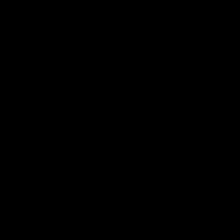

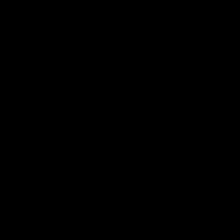

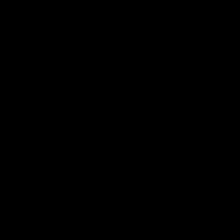

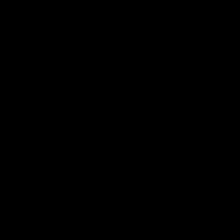

[1 1 1 1]


In [ ]:
use_samples = [1, 2, 3, 4]
samples_to_predict = []
# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = x_train[sample]
  samples_to_predict.append(reshaped_image)
  cv2_imshow(reshaped_image)
samples_to_predict = np.asarray(samples_to_predict)
predictions = CNN_model.predict(samples_to_predict)
classes = np.argmax(predictions, axis = 1)
pred_labels = classes
print(classes)

In [ ]:
for i in use_samples:
    count=0
    for j in y_train[i]:
      if j==1:
        print(count)
        break
      else:
        count+=1

1
2
2
2
